In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import pmdarima as pm

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

import seaborn as sns # for plot visualization
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [15]:
# read the data
df = pd.read_csv('weather_data/weather_data.csv')
# df = pd.read_csv('weather_data/rdu-weather-history.csv')

In [16]:
df

,Date,Month,Week,Year,City,Code,Location,State,Avg_Temp,Max_Temp,Min_Temp,Wind_Direction,Wind_Speed,Precipitation
0,03/01/16,1,3,2016,Birmingham,BHM,"Birmingham, AL",Alabama,39,46,32,33,4.33,0.00
1,03/01/16,1,3,2016,Huntsville,HSV,"Huntsville, AL",Alabama,39,47,31,32,3.86,0.00
2,03/01/16,1,3,2016,Mobile,MOB,"Mobile, AL",Alabama,46,51,41,35,9.73,0.16
3,03/01/16,1,3,2016,Montgomery,MGM,"Montgomery, AL",Alabama,45,52,38,32,6.86,0.00
4,03/01/16,1,3,2016,Anchorage,ANC,"Anchorage, AK",Alaska,34,38,29,19,7.80,0.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16738,01/01/17,1,1,2017,Casper,CPR,"Casper, WY",Wyoming,23,32,15,23,19.98,0.08
16739,01/01/17,1,1,2017,Cheyenne,CYS,"Cheyenne, WY",Wyoming,32,42,21,26,15.16,0.00
16740,01/01/17,1,1,2017,Lander,LND,"Lander, WY",Wyoming,17,29,4,26,1.65,0.00
16741,01/01/17,1,1,2017,Rawlins,RWL,"Rawlins, WY",Wyoming,23,31,13,24,18.16,0.06


In [17]:
# df_weather = df.drop(["Month", "Week", "Year", "City", "Code", "State"], axis=1)

In [18]:
# df_weather

In [19]:
# we have to take one city at a time
tmp = df.query('City == "Meridian"')
tmp.head()

,Date,Month,Week,Year,City,Code,Location,State,Avg_Temp,Max_Temp,Min_Temp,Wind_Direction,Wind_Speed,Precipitation
156,03/01/16,1,3,2016,Meridian,MEI,"Meridian, MS",Mississippi,43,49,36,34,5.56,0.01
471,10/01/16,1,10,2016,Meridian,MEI,"Meridian, MS",Mississippi,45,53,33,13,5.37,0.10
786,17/01/16,1,17,2016,Meridian,MEI,"Meridian, MS",Mississippi,44,58,29,22,3.55,0.10
1101,24/01/16,1,24,2016,Meridian,MEI,"Meridian, MS",Mississippi,42,52,31,17,6.17,1.50
1416,31/01/16,1,31,2016,Meridian,MEI,"Meridian, MS",Mississippi,50,65,36,20,6.77,1.53


In [20]:
df_weather_meridian = tmp.drop(["Month", "Week", "Year", "City", "Code", "Location", "State"], axis=1)
df_weather_meridian.head()

,Date,Avg_Temp,Max_Temp,Min_Temp,Wind_Direction,Wind_Speed,Precipitation
156,03/01/16,43,49,36,34,5.56,0.01
471,10/01/16,45,53,33,13,5.37,0.10
786,17/01/16,44,58,29,22,3.55,0.10
1101,24/01/16,42,52,31,17,6.17,1.50
1416,31/01/16,50,65,36,20,6.77,1.53


In [21]:
df_weather_meridian['Date'] = pd.to_datetime(df_weather_meridian['Date'])

<AxesSubplot:>

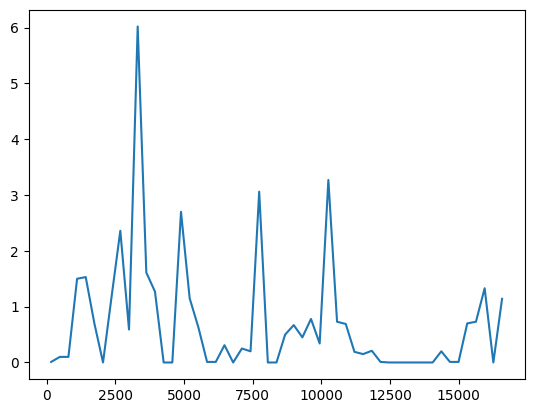

In [22]:
df_weather_meridian['Precipitation'].plot()


array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>], dtype=object)

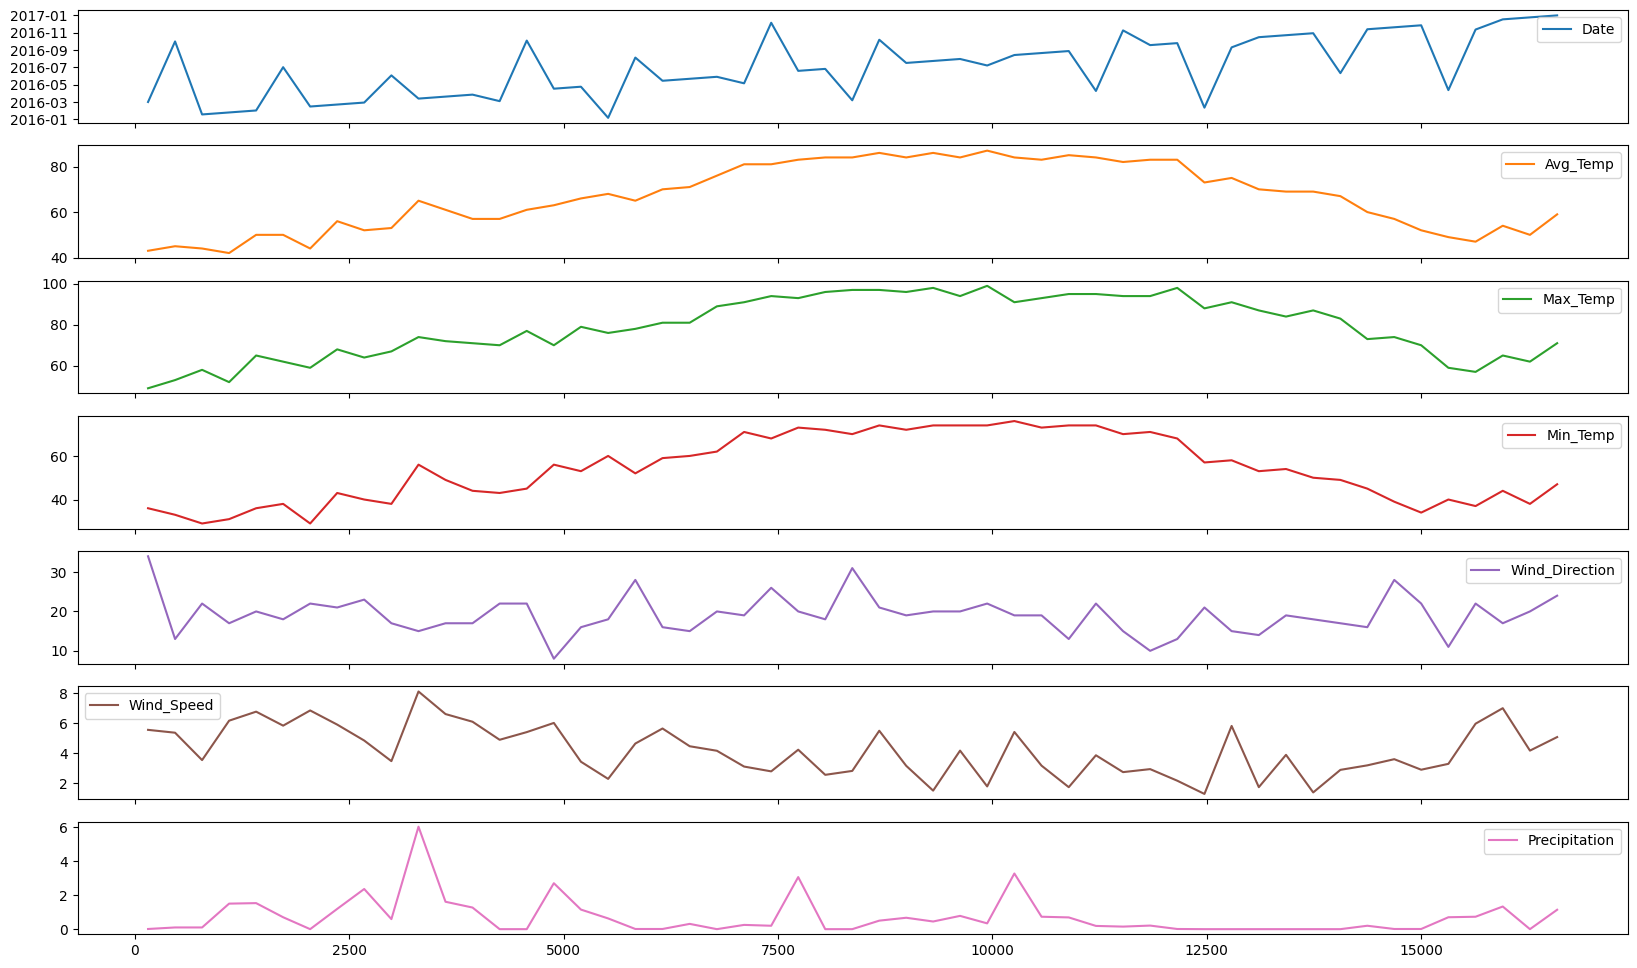

In [23]:
df_weather_meridian.plot(subplots=True, figsize=(20,12))

In [24]:
el_df = df_weather_meridian.set_index('Date')

In [25]:
el_df.head()

,Avg_Temp,Max_Temp,Min_Temp,Wind_Direction,Wind_Speed,Precipitation
Date,,,,,,
2016-03-01,43,49,36,34,5.56,0.01
2016-10-01,45,53,33,13,5.37,0.10
2016-01-17,44,58,29,22,3.55,0.10
2016-01-24,42,52,31,17,6.17,1.50
2016-01-31,50,65,36,20,6.77,1.53


In [26]:
lowest_date = el_df.index.min()
highest_date = el_df.index.max()

print("Lowest Date:", lowest_date)
print("Highest Date:", highest_date)

Lowest Date: 2016-01-05 00:00:00
Highest Date: 2017-01-01 00:00:00


array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

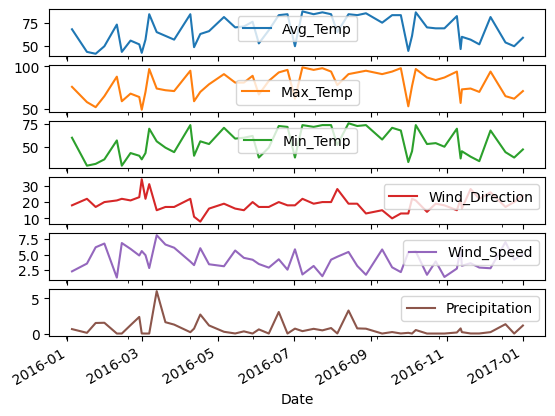

In [27]:
el_df.plot(subplots=True)

In [28]:
# missing values
print(f"Missing values in the dataset: {el_df.isnull().sum()}")

Missing values in the dataset: Avg_Temp          0
Max_Temp          0
Min_Temp          0
Wind_Direction    0
Wind_Speed        0
Precipitation     0
dtype: int64


array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

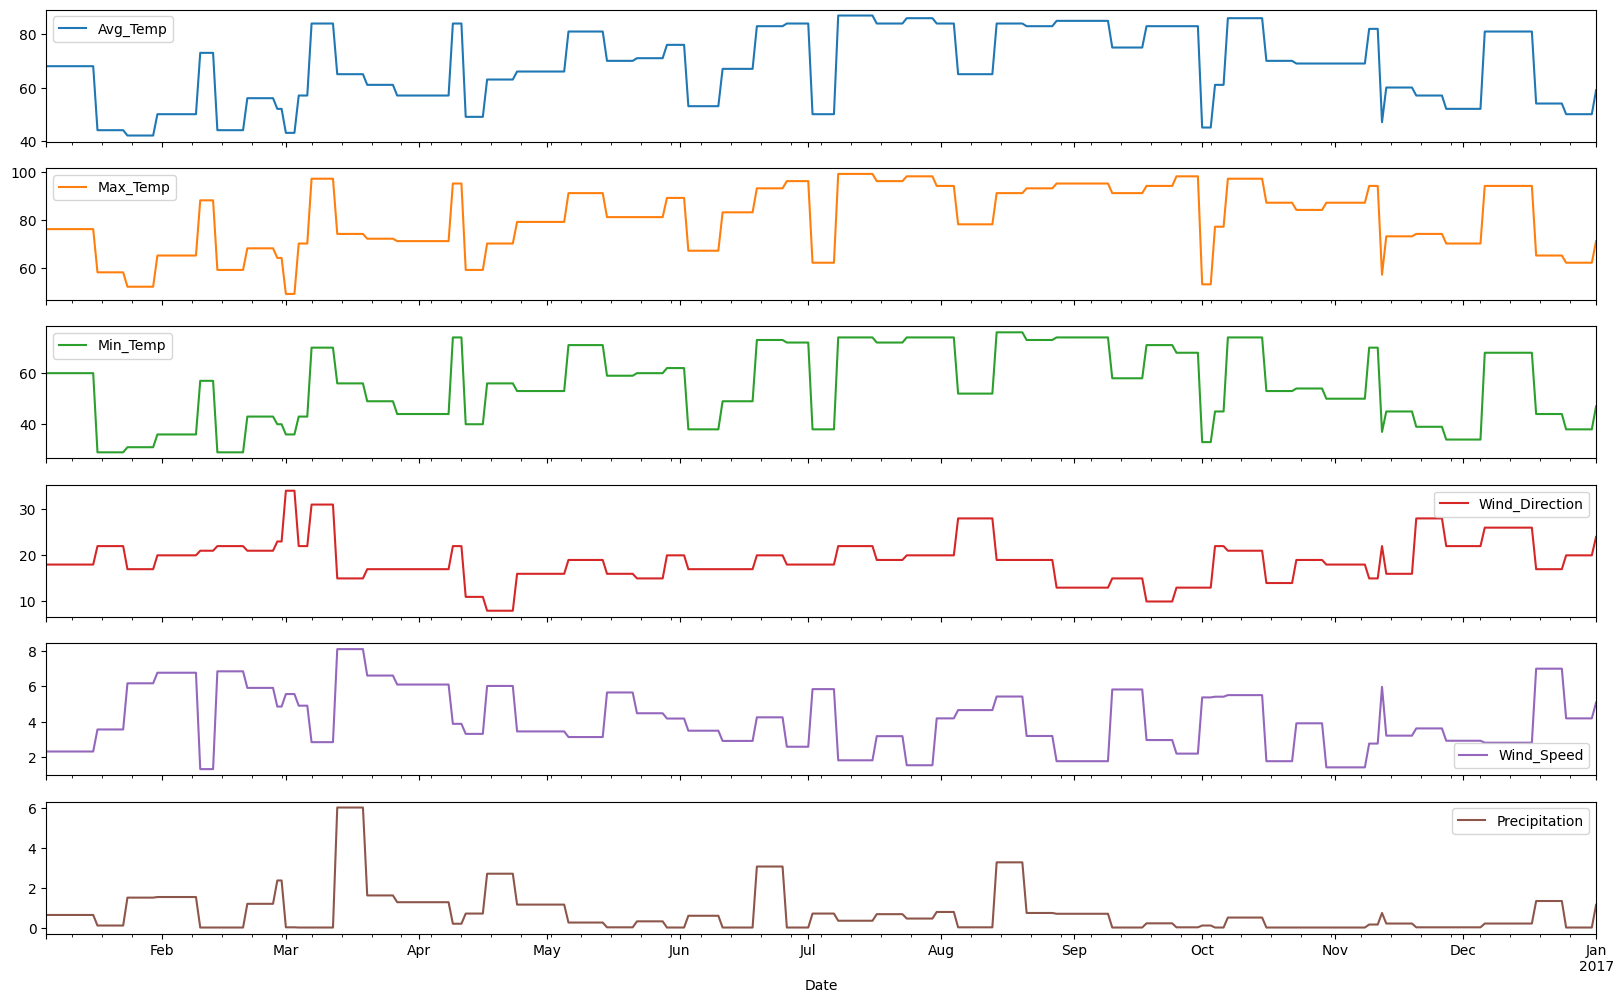

In [29]:
el_df.resample('D').fillna(method='pad').plot(subplots=True, figsize=(20,12))

In [30]:
# dataset resampling by days
el_df_resampled = el_df.resample('D').mean().fillna(method='pad')


In [31]:
el_df_resampled

,Avg_Temp,Max_Temp,Min_Temp,Wind_Direction,Wind_Speed,Precipitation
Date,,,,,,
2016-01-05,68.0,76.0,60.0,18.0,2.30,0.63
2016-01-06,68.0,76.0,60.0,18.0,2.30,0.63
2016-01-07,68.0,76.0,60.0,18.0,2.30,0.63
2016-01-08,68.0,76.0,60.0,18.0,2.30,0.63
2016-01-09,68.0,76.0,60.0,18.0,2.30,0.63
...,...,...,...,...,...,...
2016-12-28,50.0,62.0,38.0,20.0,4.18,0.00
2016-12-29,50.0,62.0,38.0,20.0,4.18,0.00
2016-12-30,50.0,62.0,38.0,20.0,4.18,0.00


In [32]:
el_df_resampled.describe()

,Avg_Temp,Max_Temp,Min_Temp,Wind_Direction,Wind_Speed,Precipitation
count,363.000000,363.000000,363.000000,363.000000,363.000000,363.000000
mean,67.870523,80.258953,55.101928,18.741047,4.066584,0.722975
std,13.823764,13.525672,14.615441,4.558902,1.728309,1.078561
min,42.000000,49.000000,29.000000,8.000000,1.300000,0.000000
25%,57.000000,70.000000,43.000000,16.000000,2.830000,0.010000
50%,68.000000,81.000000,54.000000,18.000000,3.610000,0.340000
75%,83.000000,94.000000,71.000000,21.000000,5.650000,1.150000
max,87.000000,99.000000,76.000000,34.000000,8.110000,6.020000


In [33]:
el_df_resampled.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 363 entries, 2016-01-05 to 2017-01-01
Freq: D
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Avg_Temp        363 non-null    float64
 1   Max_Temp        363 non-null    float64
 2   Min_Temp        363 non-null    float64
 3   Wind_Direction  363 non-null    float64
 4   Wind_Speed      363 non-null    float64
 5   Precipitation   363 non-null    float64
dtypes: float64(6)
memory usage: 19.9 KB


array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

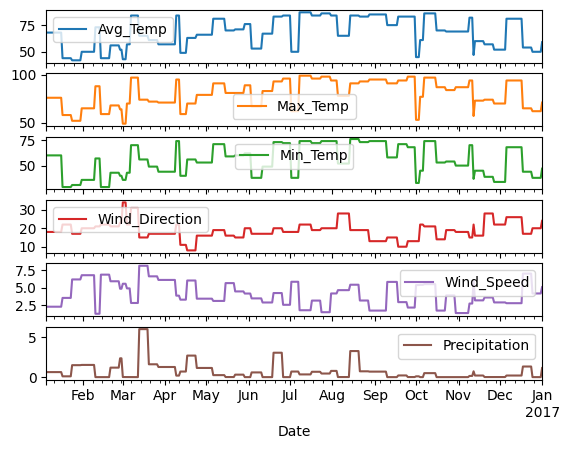

In [34]:
el_df_resampled.plot(subplots=True)

In [35]:
train_df = el_df_resampled[(el_df_resampled.index.get_level_values(0) <= '2016-10-31')]

test_df = el_df_resampled[(el_df_resampled.index.get_level_values(0) > '2016-10-31')]

In [36]:
print(f"Train dataset shape: {train_df.shape}")
print(f"Test dataset shape: {test_df.shape}")

Train dataset shape: (301, 6)
Test dataset shape: (62, 6)


In [37]:
# check rolling mean and rolling standard deviation
def plot_rolling_mean_std(ts):
    rolling_mean = ts.rolling(5).mean()
    rolling_std = ts.rolling(5).std()
    plt.figure(figsize=(22,10))

    plt.plot(ts, label='Actual Mean')
    plt.plot(rolling_mean, label='Rolling Mean')
    plt.plot(rolling_std, label = 'Rolling Std')
    plt.xlabel("Date")
    plt.ylabel("Mean Temperature")
    plt.title('Rolling Mean & Rolling Standard Deviation')
    plt.legend()
    plt.show()

In [38]:
# Augmented Dickey–Fuller test
def perform_dickey_fuller_test(ts):
    result = adfuller(ts, autolag='AIC')
    print('Test statistic: ' , result[0])
    print('Critical Values:' ,result[4])

In [39]:
train_df

,Avg_Temp,Max_Temp,Min_Temp,Wind_Direction,Wind_Speed,Precipitation
Date,,,,,,
2016-01-05,68.0,76.0,60.0,18.0,2.3,0.63
2016-01-06,68.0,76.0,60.0,18.0,2.3,0.63
2016-01-07,68.0,76.0,60.0,18.0,2.3,0.63
2016-01-08,68.0,76.0,60.0,18.0,2.3,0.63
2016-01-09,68.0,76.0,60.0,18.0,2.3,0.63
...,...,...,...,...,...,...
2016-10-27,69.0,84.0,54.0,19.0,3.9,0.00
2016-10-28,69.0,84.0,54.0,19.0,3.9,0.00
2016-10-29,69.0,84.0,54.0,19.0,3.9,0.00


In [40]:
test_df

,Avg_Temp,Max_Temp,Min_Temp,Wind_Direction,Wind_Speed,Precipitation
Date,,,,,,
2016-11-01,69.0,87.0,50.0,18.0,1.40,0.00
2016-11-02,69.0,87.0,50.0,18.0,1.40,0.00
2016-11-03,69.0,87.0,50.0,18.0,1.40,0.00
2016-11-04,69.0,87.0,50.0,18.0,1.40,0.00
2016-11-05,69.0,87.0,50.0,18.0,1.40,0.00
...,...,...,...,...,...,...
2016-12-28,50.0,62.0,38.0,20.0,4.18,0.00
2016-12-29,50.0,62.0,38.0,20.0,4.18,0.00
2016-12-30,50.0,62.0,38.0,20.0,4.18,0.00


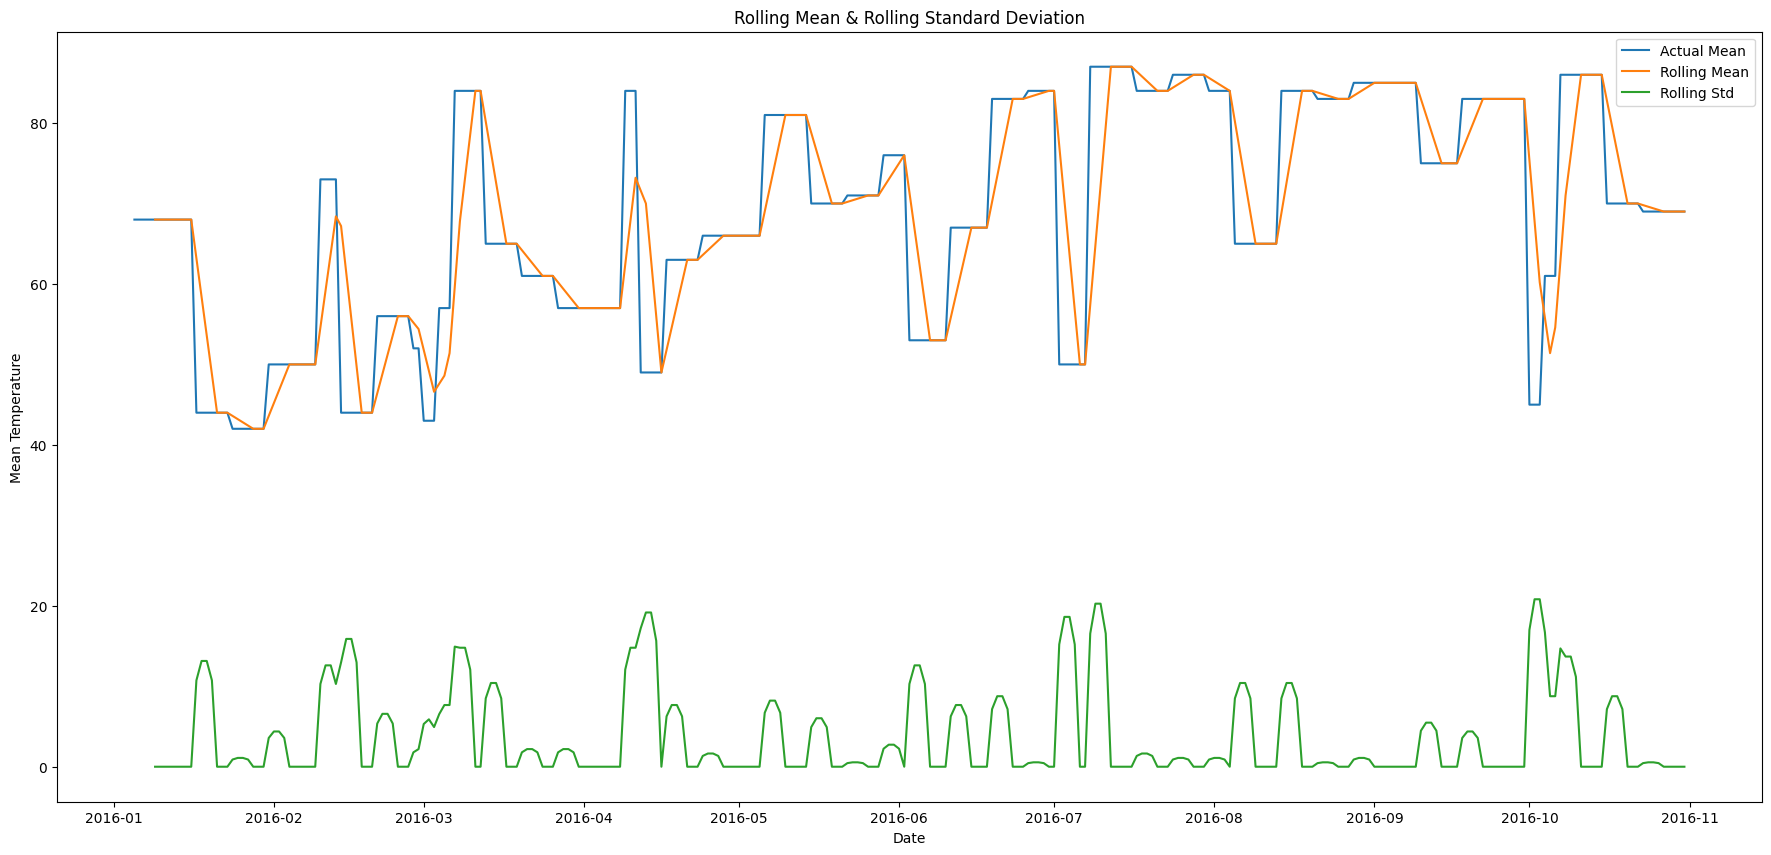

Test statistic:  -3.249771222547324
Critical Values: {'1%': -3.452789844280995, '5%': -2.871421512222641, '10%': -2.5720351510944512}


In [41]:
# check stationary: mean, variance(std)and adfuller test
plot_rolling_mean_std(train_df.Avg_Temp)
perform_dickey_fuller_test(train_df.Avg_Temp)

In [42]:
p = 1  # Non-seasonal AR order
d = 1  # Non-seasonal differencing order
q = 1  # Non-seasonal MA order

P = 1  # Seasonal AR order
D = 1  # Seasonal differencing order
Q = 1  # Seasonal MA order
m = 3  # Seasonal frequency (e.g., 12 for monthly data)

In [43]:
# initialize auto ARIMA model with PMDARIMA library and Augmented Dickey-Fuller test 
model = SARIMAX(el_df_resampled['Precipitation'], order=(p, d, q), seasonal_order=(P, D, Q, m))

SARIMA (Seasonal AutoRegressive Integrated Moving Average) model using the `statsmodels` library in Python. Let me break down the different components of this code:

`order=(1, 1, 1)`: This is a tuple representing the non-seasonal order of the SARIMA model. The three values `(p, d, q)` in the tuple stand for:

   - `p` (AutoRegressive order): The number of lag observations included in the model. In your case, it's 1.
   - `d` (Integrated order): The number of differences needed to make the time series stationary. In your case, it's 1.
   - `q` (Moving Average order): The number of lagged forecast errors included in the model. In your case, it's 1.

`seasonal_order=(1, 1, 1, 7)`: This is a tuple representing the seasonal order of the SARIMA model. The four values `(P, D, Q, S)` in the tuple stand for:

   - `P` (Seasonal AutoRegressive order): The number of seasonal lag observations included in the model.
   - `D` (Seasonal Integrated order): The number of seasonal differences needed to make the time series stationary.
   - `Q` (Seasonal Moving Average order): The number of seasonal lagged forecast errors included in the model.
   - `S` (Seasonal Periodicity): The number of time steps per seasonal cycle. In your case, it's 7, which suggests a weekly seasonality.

So, in summary, the code is creating a SARIMA model for the `df_scaled` time series data with non-seasonal orders (1, 1, 1) and seasonal orders (1, 1, 1, 7). This model can be used for time series forecasting and analysis, taking into account both non-seasonal and seasonal patterns in the data.

In [44]:
model_fit = model.fit()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.01751D+00    |proj g|=  2.39604D-01

At iterate    5    f=  9.22474D-01    |proj g|=  2.00326D-01

At iterate   10    f=  8.89768D-01    |proj g|=  1.27917D-02

At iterate   15    f=  8.88140D-01    |proj g|=  1.99148D-03

At iterate   20    f=  8.88024D-01    |proj g|=  4.08670D-04

At iterate   25    f=  8.88011D-01    |proj g|=  4.20787D-03

At iterate   30    f=  8.86567D-01    |proj g|=  2.64555D-02


/opt/homebrew/Caskroom/miniconda/base/envs/py39/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/opt/homebrew/Caskroom/miniconda/base/envs/py39/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
 This problem is unconstrained.



At iterate   35    f=  8.70645D-01    |proj g|=  9.15586D-02

At iterate   40    f=  8.59815D-01    |proj g|=  1.40131D-02

At iterate   45    f=  8.58760D-01    |proj g|=  5.10217D-03

At iterate   50    f=  8.58700D-01    |proj g|=  6.74524D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     50     65      1     0     0   6.745D-04   8.587D-01
  F =  0.85870008065509362     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


/opt/homebrew/Caskroom/miniconda/base/envs/py39/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


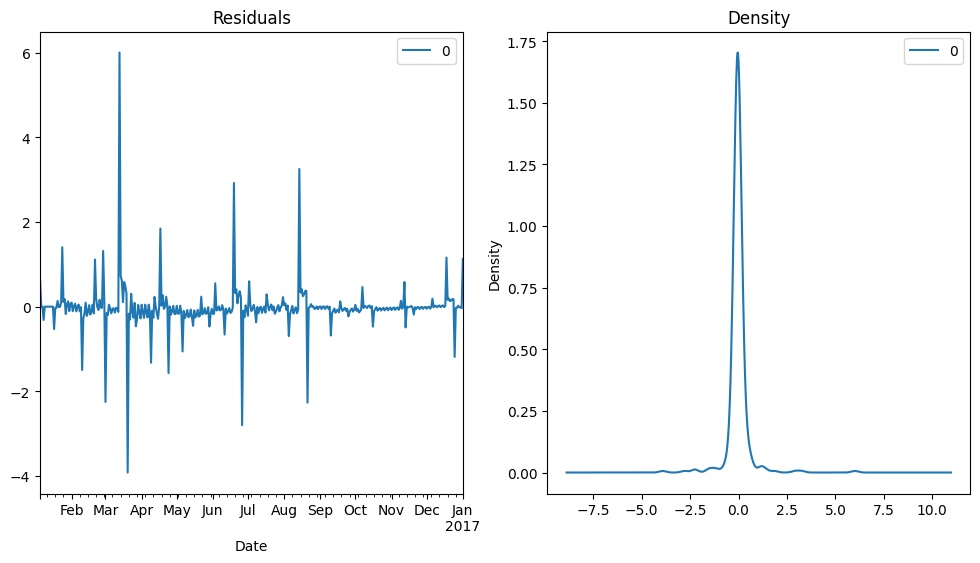

In [45]:
# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)  # Remove the parentheses
fig, ax = plt.subplots(1, 2, figsize=(12, 6))  # Adjust the figsize as needed
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

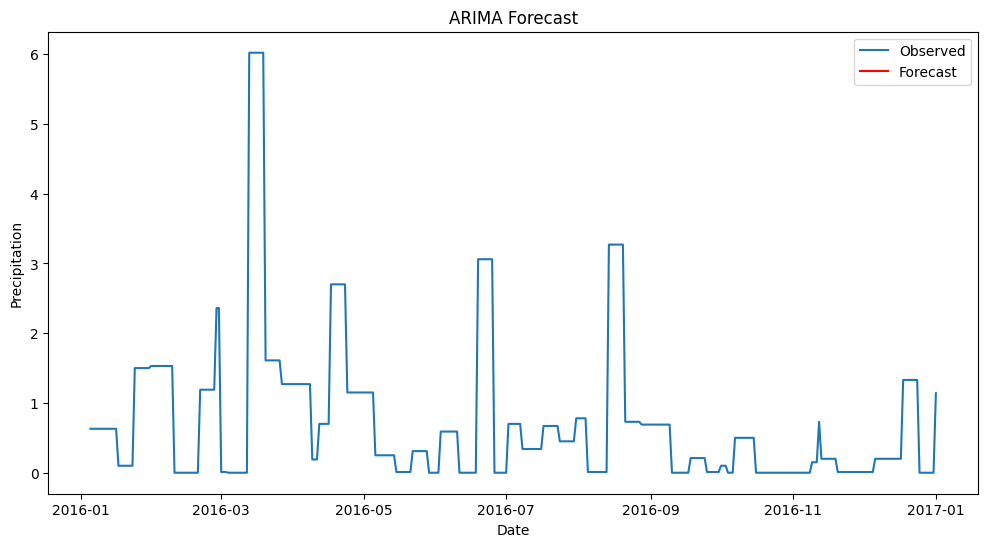

In [46]:
# Plot the forecasted values without confidence intervals
forecast = model_fit.predict(n_periods=30)

# Create a time index for the forecasted values (assuming your time index is a DatetimeIndex)
forecast_index = pd.date_range(start=el_df_resampled.index[-1] + pd.DateOffset(1), 
                              periods=30, freq='D')

# Create a DataFrame for the forecasted values
forecast_df = pd.DataFrame({'Forecast': forecast}, index=forecast_index)

# Plot the forecast
plt.figure(figsize=(12, 6))  # Adjust the figsize as needed
plt.plot(el_df_resampled['Precipitation'], label='Observed')
plt.plot(forecast_df, label='Forecast', color='red')
plt.legend()
plt.title('ARIMA Forecast')
plt.xlabel('Date')
plt.ylabel('Precipitation')
plt.show()



In [47]:
# forecasting the test dataset
forecast = model_fit.predict(n_periods=len(test_df), return_conf_int=True)

In [48]:
forecast

Date
2016-01-05    0.000000
2016-01-06    0.630000
2016-01-07    0.630000
2016-01-08    0.945000
2016-01-09    0.630000
                ...   
2016-12-28   -0.021060
2016-12-29    0.015404
2016-12-30    0.016054
2016-12-31    0.036527
2017-01-01    0.013346
Freq: D, Name: predicted_mean, Length: 363, dtype: float64

In [49]:
forecast_df = pd.DataFrame(forecast[0], index = test_df.index, columns=['forecast'])

<AxesSubplot:xlabel='Date'>

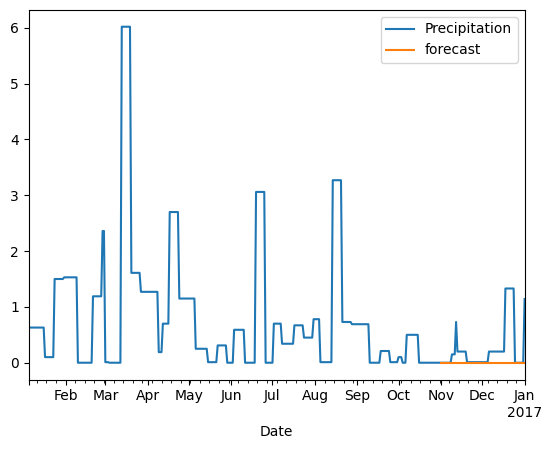

In [50]:
pd.concat([el_df_resampled['Precipitation'], forecast_df], axis=1).plot()

In [51]:
forecast2 = model_fit.predict(n_periods=2, return_conf_int=True)

In [52]:
forecast_df2 = pd.DataFrame(forecast2[0], index = test_df.index, columns=['Forecast'])

In [53]:
forecast_df2

,Forecast
Date,
2016-11-01,0.0
2016-11-02,0.0
2016-11-03,0.0
2016-11-04,0.0
2016-11-05,0.0
...,...
2016-12-28,0.0
2016-12-29,0.0
2016-12-30,0.0


<AxesSubplot:xlabel='Date'>

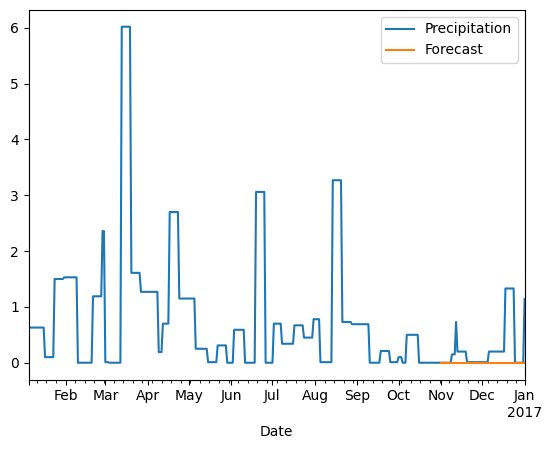

In [54]:
pd.concat([el_df_resampled['Precipitation'], forecast_df2], axis=1).plot()

In [58]:
# Define the start and end dates for prediction
start_date = '2023-09-01'
end_date = '2023-09-02'

# Make predictions within the specified date range
preds = model_fit.predict(start=start_date, end=end_date)

In [59]:
forecast_df3 = pd.DataFrame(preds[0], index = test_df.index, columns=['Forecast'])

<AxesSubplot:xlabel='Date'>

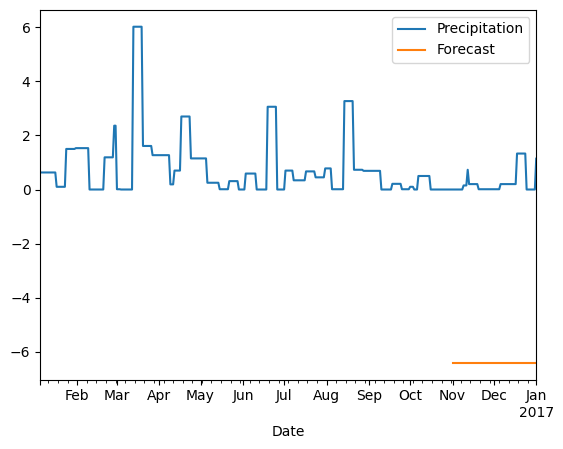

In [60]:
pd.concat([el_df_resampled['Precipitation'], forecast_df3], axis=1).plot()